# physics724: Advanced Methods of Data Analysis

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Remember to delete the `raise NotImplementedError()` statements as you implement your solutions.

---

# Exercise 5.1: Regression

Here we will follow the example given in the lecture for regression with polynomial basis functions.

Say we have a dataset with real measurements of two variables $x$ and $y$. We want to model the relationship between the variables.

To make the exercise pedagogical, the actual relationship is given to you: $y = \sin(x) + 10$. Experiments are substituted by a function that generates random points with some Gaussian smearing in the $y$ direction to simulate experimental uncertainty.

The data from the first experiment is in the file `regression_data.csv`.

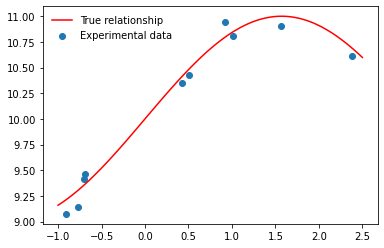

In [1]:
from scipy.stats import uniform as generator
from scipy.stats import norm as err
import pandas as pd
import numpy as np

def f(x):
    return 10 + np.sin(x)

def generate_data(N):
    x = generator.rvs(size=N)*3.5 - 1
    y = f(x) + err.rvs(scale = 0.1, size=N)
    return pd.DataFrame(data = {"x":x, "y":y})

df = pd.read_csv("regression_data.csv")

from matplotlib import pyplot as plt
plt.scatter(df["x"], df["y"], label = "Experimental data")
x_values = np.linspace(-1, 2.5, 100)
plt.plot(x_values, f(x_values), "r", label = "True relationship")
plt.legend(loc='best', frameon=False)
plt.show()

1) Perform curve fits to the data with polynomial functions of degree 1 to 8 and plot the predicted curve against the data points.

A polynomial of degree $n$ with coefficients $\vec{c} = (c_0, ... c_n)$ is simply
$$
f_n(x|\vec{c}) = \sum_{i=0}^n c_i x^i
$$

*Hint:* you can use [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html) and [polyval](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyval.html) from NumPy.

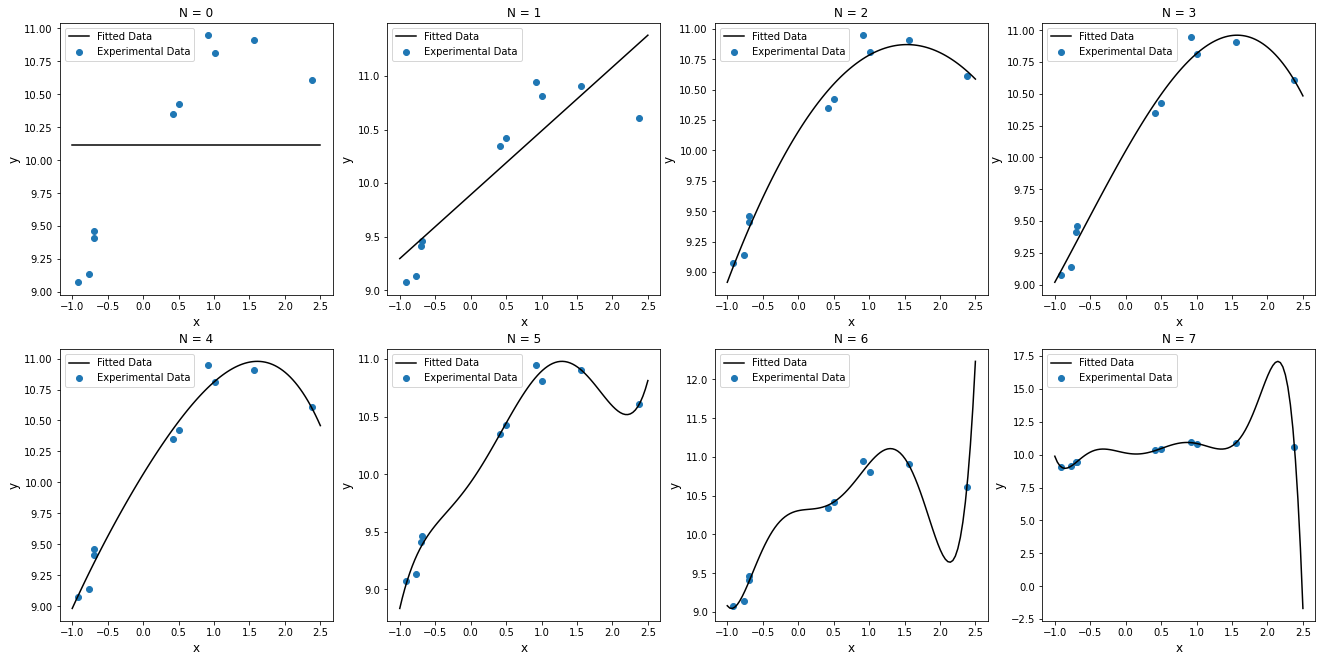

In [42]:
from numpy.polynomial import polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd

c = [[] for i in range(8)]
poly_fitted = [[] for i in range(8)]

for i in range(8):
    c[i] = poly.polyfit(df['x'],df['y'],i+1)
    poly_fitted[i] = poly.polyval(x_values,c[i])

fig,axs = plt.subplots(2,4,figsize=(22.5,11))
axs =axs.ravel()

for i in range(8):
    axs[i].scatter(df['x'],df['y'],label = 'Experimental Data')
    axs[i].plot(x_values,poly_fitted[i],'k-',label = 'Fitted Data')
    axs[i].set_xlabel('x',fontsize = 12)
    axs[i].set_ylabel('y',fontsize = 12)
    axs[i].set_title('N = '+str(i+1))
    axs[i].legend()    
plt.show()

Now we want to evaluate the relationship that we have 'learned' from the first dataset by evaluating the $\chi^2$ of the models over many repeated experiments, where $$\chi^2 \equiv \frac{(y_\text{obs} - y_\text{exp})^2}{y_\text{exp}}$$

2) a) For each of the fitted functions from the previous part, evaluate the $\chi^2$ on many (e.g. 100) new samples of equal size to the first.

You can use the `generate_data(N)` function defined in the first code cell.

Counter-intuitively, it's best to use the $y$ from the generated data as the "expected" value, and the predicted $y$ from the model as the "observed" value.

b) Plot the average test $\chi^2$ as a function of degree of the polynomial.

Order of polynomial that minimizes $$\chi^2$$ = 4


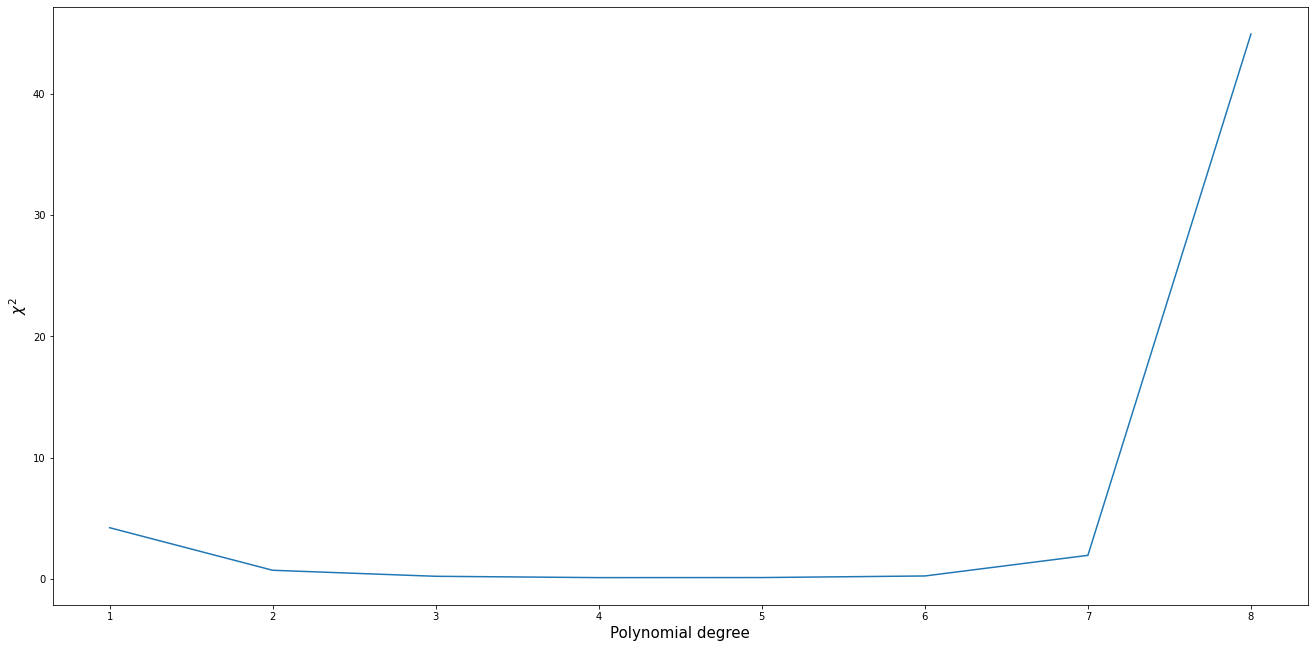

In [71]:
# YOUR CODE HERE
df_new = generate_data(100)
y_new = df_new['y']
x_new = df_new['x']

def chi_sq(obs,exp):
    ch = np.sum((obs-exp)**2/exp)
    return ch

y_pred,chisq = [],[]

for i in range(8):
    y_pred.append(poly.polyval(x_new,c[i]))
    chisq.append(chi_sq(y_new,y_pred[i]))

N = [i for i in range(1,9)]

fig2,ax2= plt.subplots(1,1,figsize=(22.5,11))
ax2.plot(N,chisq)
ax2.set_ylabel(r'$\chi^2$',fontsize=15)
ax2.set_xlabel('Polynomial degree',fontsize = 15)
best = np.argmin(chisq) + 1
print('Order of polynomial that minimizes $$\chi^2$$ = %s'%best) 